# Part 2: Simulating with DeerLab models

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import deerlab as dl

## Learning Objectives of Part 2

- To obtain a basic understanding of the structure of models in DeerLab 
- To be able to simulate simple dipolar signals for experiments such as 4-pulse DEER
- To understand how to simulate individual componets of a dipolar signals such as distance distributions, or background functions.

---------------------

## DeerLab models, the basics

All DeerLab models consist of a set of parameters. Each parameter will always have the following properties that can be modified at any point (we will see how later):

- ``Start``
    The start values at which the parameters search start during fitting and optimization. 

- ``Lower/Upper``
    The upper/lower bounds of the parameter that constrain the parameter values during fitting and optimization.

- ``Frozen``
    Whether a parameter is frozen to a specific value. Freezing refers to setting a parameter to a static value and to be omitted during the fitting routines. 

- ``Constants`` Any quantities required by the model to be calculated but that are not considered parameters and thus kept constant during the fitting routines.

- ``Signature`` The order in which to pass the parameters in order to evaluate the model at specific values. 

You can quickly and easily inspect all the model properties by displaying the model's summary using the ``print()`` function.  

In [4]:
# Print the summary of the Gaussian distance distirbution model
print(dl.dd_gauss)

Description: Gaussian distribution model
Signature: (r, mean, std)
Constants: [r]
Parameter Table: 
====== ======= ======= ======== ======== ====== ==================== 
 Name   Lower   Upper    Type    Frozen   Unit   Description         
====== ======= ======= ======== ======== ====== ==================== 
 mean       1      20   nonlin     No      nm    Mean                
 std     0.05     2.5   nonlin     No      nm    Standard deviation  
====== ======= ======= ======== ======== ====== ==================== 


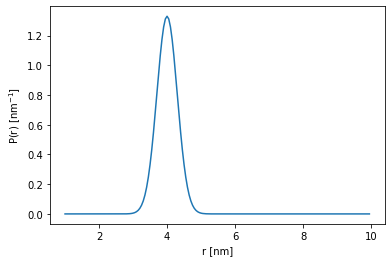

In [5]:


# Define vector of interspin distances
r = np.arange(1,10,0.05) # nm, 0.05nm resolution

rmean = 4 # Mean distance, nm
rstd = 0.3 # Standard deviation of distances, nm  

# Evaluate the model using positional arguments (order of arguments is important)
P = dl.dd_gauss(r,rmean,rstd)

# EValuate the model using keyword arguments (order of arguments in not important)
P = dl.dd_gauss(mean=rmean, std=rstd, r=r)

plt.plot(r,P)
plt.xlabel('r [nm]')
plt.ylabel('P(r) [nm$^{-1}$]')
plt.show()

**Remember:** All dipolar EPR-related models in DeerLab define **time units in microseconds** and **distance units in nanometers**!


You can get more detailed information and tutorials on how DeerLab's models work and how to contruct you own models using the [following documentation](https://jeschkelab.github.io/DeerLab/modelling_guide.html). 

-----------

## Hands-on: Simulating a distance distribution

Simulate a distance distribution `P(r)` modeled as skewed Gaussian centered about 5.4nm with a spread of 0.55nm and a skewness factor of -5.  
First, check the detail on the model by printing it. Next, simulate the distribution and make a plot `r` vs `P(r)` using the Matplotlib package.

In [6]:
# Get info on the model
print(dl.dd_skewgauss)

Description: Skew Gaussian distribution model
Signature: (r, center, std, skew)
Constants: [r]
Parameter Table: 
======== ======= ======= ======== ======== ====== ============= 
 Name     Lower   Upper    Type    Frozen   Unit   Description  
======== ======= ======= ======== ======== ====== ============= 
 center       1      20   nonlin     No      nm    Center       
 std       0.05     2.5   nonlin     No      nm    Spread       
 skew       -25      25   nonlin     No            Skewness     
======== ======= ======= ======== ======== ====== ============= 


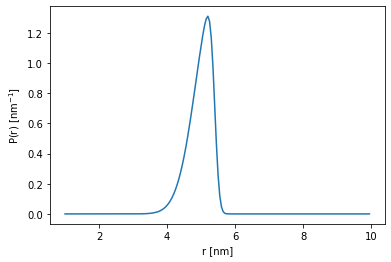

In [7]:
# Define vector of interspin distances
r = np.arange(1,10,0.05) # nm, 0.05nm resolution

# Model parameters
rcenter = 5.4 # Center distance, nm
rspread = 0.55 # Spread of distances, nm
skewfactor = -5 # Skewness factor

# Call the function using positional arguments 
P = dl.dd_skewgauss(r,rcenter,rspread,skewfactor)

# Call the function using keyword arguments 
P = dl.dd_skewgauss(r,skew=skewfactor,std=rspread,center=rcenter)

plt.plot(r,P)
plt.xlabel('r [nm]')
plt.ylabel('P(r) [nm$^{-1}$]')
plt.show()

In [8]:
print(dl.dd_randcoil)

Description: Random-coil model for an unfolded peptide/protein
Signature: (r, Nres, scaling, length)
Constants: [r]
Parameter Table: 
========= ======= ======= ======== ======== ====== ==================== 
 Name      Lower   Upper    Type    Frozen   Unit   Description         
========= ======= ======= ======== ======== ====== ==================== 
 Nres          2   1e+03   nonlin     No            Number of residues  
 scaling     0.1     0.4   nonlin     No      nm    Scaling exponent    
 length     0.33       1   nonlin     No            Segment length      
========= ======= ======= ======== ======== ====== ==================== 


-------------

# Dipolar signal models

To construct a model of a dipolar signal, DeerLab provides the ``dipolarmodel`` function, which will contruct different dipolar models based on your needs. The minimum information that you need to provide to ``dipolarmodel`` is the vector of dipolar evolution times ``t`` and the vector of interspin distances ``r``.  By doing so, ``dipolarmodel`` will construct a single-pathway dipolar model (the same model used in all other software such as DeerAnalysis, LongDistances, etc.) with a non-parametric distance distribution.

In [9]:

rmin = 1  # nm
rmax = 10 # nm
dr = 0.05 # nm
r = np.arange(rmin,rmax,dr)

tau1 = 0.5 # μs
tau2 = 6.0 # μs
dt = 0.008 # μs
t = np.arange(0,tau1+tau2,dt)

# Construct a single pathway model
Vmodel = dl.dipolarmodel(t,r)
# This is equivalent to... 
Vmodel = dl.dipolarmodel(t,r, Pmodel=None, Bmodel=dl.bg_hom3d)

print(Vmodel)


Description: Dipolar signal model
Signature: (mod, reftime, conc, P)
Constants: []
Parameter Table: 
========= ======= ======= ======== ======== ====== ====================================== 
 Name      Lower   Upper    Type    Frozen   Unit   Description                           
========= ======= ======= ======== ======== ====== ====================================== 
 mod           0       1   nonlin     No            Modulation depth                      
 reftime    -inf     inf   nonlin     No      μs    Refocusing time                       
 conc       0.01   5e+03   nonlin     No      μM    Spin concentration                    
 P             0     inf   linear     No     nm⁻¹   Non-parametric distance distribution  
========= ======= ======= ======== ======== ====== ====================================== 


The function ``dipolarsignal`` allows you to easily switch between different models of the distance distribution and the background. These can be specified via the ``Pmodel`` and ``Bmodel`` arguments. 

In [10]:
# Dipolar signal model with a Gaussian distance distribution and a homoegenous 3D-background model
Vmodel = dl.dipolarmodel(t,r,Pmodel=dl.dd_gauss)
print(Vmodel)

Description: Dipolar signal model
Signature: (mod, reftime, conc, mean, std, scale)
Constants: []
Parameter Table: 
========= ======= ======= ======== ======== ====== ==================== 
 Name      Lower   Upper    Type    Frozen   Unit   Description         
========= ======= ======= ======== ======== ====== ==================== 
 mod           0       1   nonlin     No            Modulation depth    
 reftime    -inf     inf   nonlin     No      μs    Refocusing time     
 conc       0.01   5e+03   nonlin     No      μM    Spin concentration  
 mean          1      20   nonlin     No      nm    Mean                
 std        0.05     2.5   nonlin     No      nm    Standard deviation  
 scale         0     inf   linear     No     None   None                
========= ======= ======= ======== ======== ====== ==================== 


In [11]:
# Dipolar signal model with a non-paremtric distance distribution and an exponential phenomenological background 
Vmodel = dl.dipolarmodel(t,r,Bmodel=dl.bg_exp)
print(Vmodel)

Description: Dipolar signal model
Signature: (mod, reftime, decay, P)
Constants: []
Parameter Table: 
========= ======= ======= ======== ======== ====== ====================================== 
 Name      Lower   Upper    Type    Frozen   Unit   Description                           
========= ======= ======= ======== ======== ====== ====================================== 
 mod           0       1   nonlin     No            Modulation depth                      
 reftime    -inf     inf   nonlin     No      μs    Refocusing time                       
 decay         0     200   nonlin     No     μs⁻¹   Decay rate                            
 P             0     inf   linear     No     nm⁻¹   Non-parametric distance distribution  
========= ======= ======= ======== ======== ====== ====================================== 


In [12]:
# Dipolar signal model with a Gaussian distance distribution 
Vmodel = dl.dipolarmodel(t,r,Pmodel=dl.dd_gauss)
print(Vmodel)

Description: Dipolar signal model
Signature: (mod, reftime, conc, mean, std, scale)
Constants: []
Parameter Table: 
========= ======= ======= ======== ======== ====== ==================== 
 Name      Lower   Upper    Type    Frozen   Unit   Description         
========= ======= ======= ======== ======== ====== ==================== 
 mod           0       1   nonlin     No            Modulation depth    
 reftime    -inf     inf   nonlin     No      μs    Refocusing time     
 conc       0.01   5e+03   nonlin     No      μM    Spin concentration  
 mean          1      20   nonlin     No      nm    Mean                
 std        0.05     2.5   nonlin     No      nm    Standard deviation  
 scale         0     inf   linear     No     None   None                
========= ======= ======= ======== ======== ====== ==================== 


Now, let's simulate a 4-pulse DEER signal measured on some biradical system with a Gaussian-distributed interspin distance (mean distance of 4nm with a spread of 0.3nm) and with a spin concentration of 50μM arising. Since it is a 4-pulse DEER experiment, the main pathway contribution's refocusing time (i.e. zero-time) must be at ``t=tau1`` and we will assume a modulation depth of 35%.  

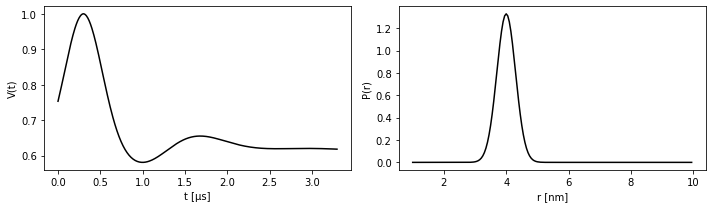

In [19]:
# Model parameters
rmean = 4 # nm
rstd = 0.3 # nm
moddepth = 0.35 
reftime = tau1 # μs
spinconc = 50  # μM

# Construct the dipolar signal model 
Vmodel = dl.dipolarmodel(t,r,Pmodel=dl.dd_gauss, Bmodel=dl.bg_hom3d)

# Simulate the dipolar signal
Vsim = Vmodel(mod=moddepth, reftime=tau1, conc=spinconc, mean=rmean, std=rstd, scale=1) 

# Plot the dipolar signal
plt.figure(figsize=[10,3])
plt.subplot(121)
plt.plot(t,Vsim,'k')
plt.xlabel('t [μs]')
plt.ylabel('V(t)')

plt.subplot(122)
P = dl.dd_gauss(r,rmean,rstd)
plt.plot(r,P,'k')
plt.xlabel('r [nm]')
plt.ylabel('P(r)')

plt.tight_layout()
plt.show()




To more accurately simulate an experimental signal, we can add some noise randomly sampled from a Gaussian distribution with a standard deviation of 0.01.

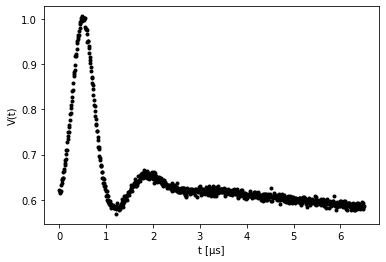

In [14]:
# Add white Gaussian noise to the simulated signal
Vnoisy = Vsim + dl.whitegaussnoise(t,std=0.005,seed=1)

# Plot the dipolar signal
plt.plot(t,Vnoisy,'k.')
plt.xlabel('t [μs]')
plt.ylabel('V(t)')
plt.show()


--------------------

## Hands-on: Predicting a 4-pulse DEER signal

We want to study via simulations, what kind of 4-pulse DEER signals we can expect from a ``75μM`` solution of linear oligomeric biradical molecules. The distribution of interspin distances in these molecules is well approximated by a worm-like chain model (implemented in DeerLab as ``dl.dd_wormchain``) with a contour length of ``3.6nm`` and a persistence length of ``15nm``. We will set our 4-pulse DEER experiments with ``tau1=0.3μs`` and ``tau2=3μs``, record our signal using ``16ns`` steps, and expect our modulation depth to be roughly ``15%``. 

*How many oscillation periods can we expect in the experimental data?*

Simulate the signal and count the oscillation periods. Type your results in the chat. 
 
Note:
- The 4-pulse DEER main contribution its refocusing time at ``t=tau1``.
- The spin concentration is (ideally) twice the molecular concentration

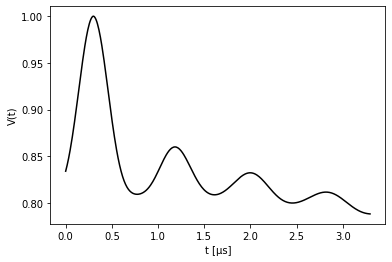

In [15]:

# Construct the dipolar time evolution vector
tau1 = 0.3
tau2 = 3
dt = 0.008
t = np.arange(0,tau1+tau2,dt)

# Construct the vector of interspin distances
rmin = 1 #nm
rmax = 10 #nm
dr = 0.05 #nm
r = np.arange(rmin,rmax,dr)

# Construct the model
Vmodel = dl.dipolarmodel(t,r,Pmodel=dl.dd_wormchain)

# Model parameters
moddepth = 0.15 
reftime = tau1 #μs
spinconc = 150  # μM, spin concentration is (ideally) twice the molecular concentration
rcontour = 3.6 #nm
rpersistence = 15 #nm
scale = 1

# Simulate the dipolar signal
Vsim = Vmodel(mod=moddepth, reftime=tau1, conc=spinconc, contour=rcontour, persistence=rpersistence, scale=scale) 

# Plot the dipolar signal
plt.plot(t,Vsim,'k')
plt.xlabel('t [μs]')
plt.ylabel('V(t)')
plt.show()


----------------

## Simulating dipolar signals with more than multiple pathway contributions

In [21]:

rmin = 1  # nm
rmax = 10 # nm
dr = 0.05 # nm
r = np.arange(rmin,rmax,dr)

tau1 = 0.5 # μs
tau2 = 6.0 # μs
dt = 0.008 # μs
t = np.arange(0,tau1+tau2,dt)

# Construct a three-pathway pathway model
Vmodel = dl.dipolarmodel(t,r,Pmodel=dl.dd_gauss,npathways=3)

print(Vmodel)


Description: Dipolar signal model
Signature: (lam1, reftime1, lam2, reftime2, lam3, reftime3, conc, mean, std, scale)
Constants: []
Parameter Table: 
========== ======= ======= ======== ======== ====== =============================== 
 Name       Lower   Upper    Type    Frozen   Unit   Description                    
========== ======= ======= ======== ======== ====== =============================== 
 lam1           0       1   nonlin     No            Amplitude of pathway #1        
 reftime1     -20      20   nonlin     No      μs    Refocusing time of pathway #1  
 lam2           0       1   nonlin     No            Amplitude of pathway #2        
 reftime2     -20      20   nonlin     No      μs    Refocusing time of pathway #2  
 lam3           0       1   nonlin     No            Amplitude of pathway #3        
 reftime3     -20      20   nonlin     No      μs    Refocusing time of pathway #3  
 conc        0.01   5e+03   nonlin     No      μM    Spin concentration             


Let's simulate a 4-pulse DEER signal with additional pathway contributions due to pulse excitation overlap. These additional contributions have their largest contributions at the edges of the signal. Specifically the refocusing times of these pathways are: 

- Pathway 1: t = tau1
- Pathway 2: t = tau1+tau2
- Pathway 3: t = 0 

We will assume that the main contribution has a modulation depth (amplitude) of 25% while the other contributions have one 1/8th of its amplitude. 

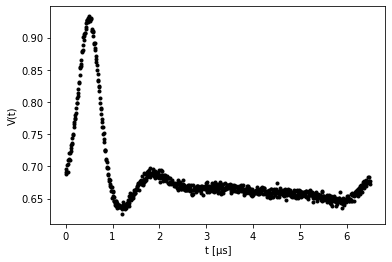

In [35]:

# Pathways refocusing times
reftime1 = tau1
reftime2 = tau1+tau2 
reftime3 = 0

# Pathway amplitudes
lam1 = 0.25
lam2 = lam1/8
lam3 = lam1/8

# Other parameters
conc = 35 # μM
rmean = 4 # nm 
rstd = 0.3 # nm

Vsim = Vmodel(mean=rmean, std=rstd, conc=conc, scale=scale, 
                lam1=lam1,lam2=lam2, lam3=lam3, 
                reftime1=reftime1,reftime2=reftime2,reftime3=reftime3)

# Add some noise
Vsim = Vsim + dl.whitegaussnoise(t,0.004,seed=1)

# Plot the dipolar signal
plt.plot(t,Vsim,'k.')
plt.xlabel('t [μs]')
plt.ylabel('V(t)')
plt.show()

-----------------

## Hands-on: Simulating a 5-pulse DEER signal

We are back to our ``75μM`` solution of linear oligomeric biradical molecules. Remember that the distribution of interspin distances in these molecules is well approximated by a worm-like chain model (implemented in DeerLab as ``dl.dd_wormchain``) with a contour length of ``3.6nm`` and a persistence length of ``15nm``.

This time we want to predict how the 5-pulse DEER experiments will look like if we use the timings ``tau1=4μs``, ``tau2=4μs``, and ``tau3=0.5μs``, and record our signal using ``16ns`` steps. We can expect at least two contributions to the dipolar signal. One contribution arising from a pathway with refocusing time ``t=tau3`` with an amplitude of ``0.4`` and a secondary contribution from a pathway with refocusing time ``t=tau2`` and amplitude ``0.1``. 

Simulate the 5-pulse DEER signal and plot the results. 

Note:
- The experimental time vector ``t`` can be recorded from ``t=0`` to ``t=tau1+tau2``.  
- The spin concentration is (ideally) twice the molecular concentration

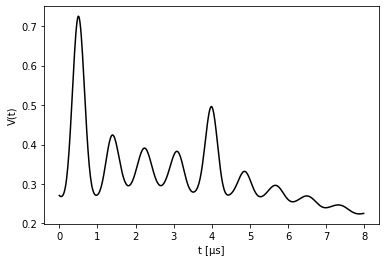

In [41]:
tau1 = 4
tau2 = 4
tau3 = 0.5 
dt = 0.016
t = np.arange(0,tau1+tau2,dt)

# Construct the vector of interspin distances
rmin = 1 #nm
rmax = 10 #nm
dr = 0.05 #nm
r = np.arange(rmin,rmax,dr)

# Construct the model
Vmodel = dl.dipolarmodel(t,r,Pmodel=dl.dd_wormchain, npathways=2)

# Pathways refocusing times
reftime1 = tau3
reftime2 = tau2 

# Pathway amplitudes
lam1 = 0.4
lam2 = 0.2

# Other parameters
spinconc = 150  # μM, spin concentration is (ideally) twice the molecular concentration
rcontour = 3.6 #nm
rpersistence = 15 #nm
scale = 1

# Run the model
Vsim = Vmodel(contour=rcontour, persistence=rpersistence, conc=spinconc, scale=scale, 
                lam1=lam1,lam2=lam2, reftime1=reftime1,reftime2=reftime2)

# Plot the dipolar signal
plt.plot(t,Vsim,'k')
plt.xlabel('t [μs]')
plt.ylabel('V(t)')
plt.show()